In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


One Hot encoding

In [74]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [75]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [76]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [77]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

validation

In [78]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [79]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 289us/step - loss: 0.4975 - acc: 0.7949 - val_loss: 0.3715 - val_acc: 0.8719
Epoch 2/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.2955 - acc: 0.9049 - val_loss: 0.2990 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.2159 - acc: 0.9285 - val_loss: 0.3083 - val_acc: 0.8722
Epoch 4/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.1741 - acc: 0.9431 - val_loss: 0.2832 - val_acc: 0.8844
Epoch 5/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8849
Epoch 6/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.1142 - acc: 0.9652 - val_loss: 0.3089 - val_acc: 0.8812
Epoch 7/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.0969 - acc: 0.9710 - val_loss: 0.3148 - 

In [80]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

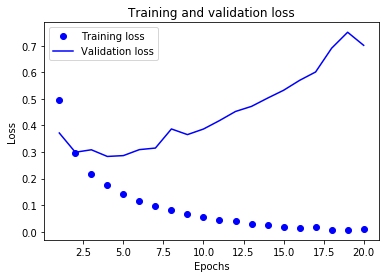

In [81]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
###############################################

In [128]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [129]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [130]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

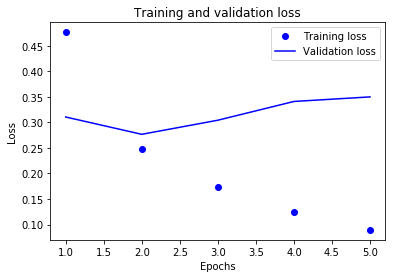

In [131]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()